In [124]:
print('5조')
print('주제 : 한국 주식시장에 영향을 미치는 요소들을 파악 후 매매 시기 추천')
print('팀원 : 김연후, 우사랑')

5조
주제 : 한국 주식시장에 영향을 미치는 요소들을 파악 후 매매 시기 추천
팀원 : 김연후, 우사랑


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import seaborn as sns

In [179]:
usd = pd.read_csv('USD_KRW.csv', encoding='euc-kr')
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1565 non-null   object 
 1   종가      1565 non-null   float64
 2   시가      1565 non-null   float64
 3   고가      1565 non-null   float64
 4   저가      1565 non-null   float64
 5   거래량     788 non-null    object 
 6   변동 %    1565 non-null   float64
dtypes: float64(5), object(2)
memory usage: 85.7+ KB


In [128]:
usd = pd.read_csv('USD_KRW.csv', encoding='euc-kr')
cny = pd.read_csv('CNY_KRW.csv', encoding='euc-kr')
kpi = pd.read_csv('KOSPI.csv', encoding='euc-kr')
kdak = pd.read_csv('KOSDAK.csv', encoding='euc-kr')
gold =pd.read_csv('GOLD.csv', encoding='euc-kr')
sp = pd.read_csv('S&P_500.csv', encoding='euc-kr')

In [129]:
cny
type(cny)

pandas.core.frame.DataFrame

In [130]:
usd
type(usd)

pandas.core.frame.DataFrame

In [131]:
kpi
type(kpi)

pandas.core.frame.DataFrame

In [132]:
gold
type(gold)

pandas.core.frame.DataFrame

In [133]:
sp
type(gold)

pandas.core.frame.DataFrame

In [134]:
kdak
type(kdak)

pandas.core.frame.DataFrame

In [135]:
#cny.head()
#cny.tail()
cny.info()
#cny.describe().T
#중국과 한국의 환율 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1565 non-null   object 
 1   종가      1565 non-null   float64
 2   시가      1565 non-null   float64
 3   고가      1565 non-null   float64
 4   저가      1565 non-null   float64
 5   거래량     0 non-null      float64
 6   변동 %    1565 non-null   float64
dtypes: float64(6), object(1)
memory usage: 85.7+ KB


In [136]:
#usd.head()
#usd.tail()
usd.info()
#usd.describe().T
#미국과 한국의 환율 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1565 non-null   object 
 1   종가      1565 non-null   float64
 2   시가      1565 non-null   float64
 3   고가      1565 non-null   float64
 4   저가      1565 non-null   float64
 5   거래량     788 non-null    object 
 6   변동 %    1565 non-null   float64
dtypes: float64(5), object(2)
memory usage: 85.7+ KB


In [137]:
#kdak.head()
#kdak.tail()
kdak.info()
#kdak.describe().T
#코스닥 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1475 non-null   object 
 1   종가      1475 non-null   float64
 2   시가      1475 non-null   float64
 3   고가      1475 non-null   float64
 4   저가      1475 non-null   float64
 5   거래량     1475 non-null   object 
 6   변동 %    1475 non-null   float64
dtypes: float64(5), object(2)
memory usage: 80.8+ KB


In [138]:
#kpi.head()
#kpi.tail()
kpi.info()
#kpi.describe().T
#코스피 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1475 non-null   object 
 1   종가      1475 non-null   float64
 2   시가      1475 non-null   float64
 3   고가      1475 non-null   float64
 4   저가      1475 non-null   float64
 5   거래량     1475 non-null   object 
 6   변동 %    1475 non-null   float64
dtypes: float64(5), object(2)
memory usage: 80.8+ KB


In [139]:
#gold.head()
#gold.tail()
gold.info()
#gold.describe().T
#금 시세 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1550 non-null   object 
 1   종가      1550 non-null   float64
 2   시가      1550 non-null   float64
 3   고가      1550 non-null   float64
 4   저가      1550 non-null   float64
 5   거래량     1548 non-null   object 
 6   변동 %    1550 non-null   float64
dtypes: float64(5), object(2)
memory usage: 84.9+ KB


In [140]:
#sp.head()
#sp.tail()
sp.info()
#sp.describe().T
#S&P_500 데이터 확인을 위해 head/tail/info/decribe를 사용하였습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1510 non-null   object 
 1   종가      1510 non-null   float64
 2   시가      1510 non-null   float64
 3   고가      1510 non-null   float64
 4   저가      1510 non-null   float64
 5   거래량     0 non-null      float64
 6   변동 %    1510 non-null   float64
dtypes: float64(6), object(1)
memory usage: 82.7+ KB


In [141]:
kdak_columns = kdak.columns
pd.Series(kdak_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [142]:
cny_columns = cny.columns
pd.Series(cny_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [143]:
usd_columns = usd.columns
pd.Series(usd_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [144]:
kpi_columns = kpi.columns
pd.Series(kpi_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [145]:
gold_columns = gold.columns
pd.Series(gold_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [146]:
sp_columns = sp.columns
pd.Series(sp_columns)

0      날짜
1      종가
2      시가
3      고가
4      저가
5     거래량
6    변동 %
dtype: object

In [147]:
#index의 값이 한국어로 표기되어 있어 더욱 편리하게 하기 위해
#영어로 변경하였습니다.
col_map = {'날짜' : 'date',
           '종가' : 'close',
           '시가' : 'open',
           '고가' : 'high',
           '저가' : 'low',
           '거래량' : 'volume',
           '변동 %' : 'fluctuations'}

kdak.rename(columns=col_map)

,date,close,open,high,low,volume,fluctuations
0,2017-01-02,632.04,632.89,633.00,629.54,512.16K,0.0010
1,2017-01-03,636.57,633.30,636.65,633.10,622.54K,0.0072
2,2017-01-04,639.79,638.73,639.91,636.74,617.47K,0.0051
3,2017-01-05,642.48,642.01,642.64,640.87,811.28K,0.0042
4,2017-01-06,643.68,643.96,644.17,641.96,758.43K,0.0019
...,...,...,...,...,...,...,...
1470,2022-12-23,691.25,704.93,704.93,691.25,1.11B,-0.0332
1471,2022-12-26,694.68,691.94,696.96,686.80,797.71M,0.0050
1472,2022-12-27,704.19,697.25,704.21,697.25,901.44M,0.0137
1473,2022-12-28,692.37,699.24,699.39,691.01,834.83M,-0.0168


In [148]:
kdak.rename(columns=col_map, inplace=True)
kdak

,date,close,open,high,low,volume,fluctuations
0,2017-01-02,632.04,632.89,633.00,629.54,512.16K,0.0010
1,2017-01-03,636.57,633.30,636.65,633.10,622.54K,0.0072
2,2017-01-04,639.79,638.73,639.91,636.74,617.47K,0.0051
3,2017-01-05,642.48,642.01,642.64,640.87,811.28K,0.0042
4,2017-01-06,643.68,643.96,644.17,641.96,758.43K,0.0019
...,...,...,...,...,...,...,...
1470,2022-12-23,691.25,704.93,704.93,691.25,1.11B,-0.0332
1471,2022-12-26,694.68,691.94,696.96,686.80,797.71M,0.0050
1472,2022-12-27,704.19,697.25,704.21,697.25,901.44M,0.0137
1473,2022-12-28,692.37,699.24,699.39,691.01,834.83M,-0.0168


In [149]:
#cny.rename(columns=col_map)
cny.rename(columns=col_map, inplace=True)
cny

,date,close,open,high,low,volume,fluctuations
0,2022-12-30,182.74,181.12,182.99,180.81,NaN,0.0094
1,2022-12-29,181.03,182.65,182.74,180.82,NaN,-0.0084
2,2022-12-28,182.57,182.79,182.99,181.54,NaN,-0.0008
3,2022-12-27,182.72,183.12,183.22,181.68,NaN,-0.0012
4,2022-12-26,182.94,183.10,183.49,182.35,NaN,-0.0004
...,...,...,...,...,...,...,...
1560,2017-01-06,173.68,171.54,173.73,171.29,NaN,0.0122
1561,2017-01-05,171.58,172.54,173.11,171.43,NaN,-0.0052
1562,2017-01-04,172.48,173.36,174.06,172.30,NaN,-0.0051
1563,2017-01-03,173.37,173.39,174.67,172.83,NaN,0.0001


In [150]:
usd.rename(columns=col_map, inplace=True)
usd

,date,close,open,high,low,volume,fluctuations
0,2022-12-30,1260.92,1261.24,1265.34,1253.26,NaN,0.0001
1,2022-12-29,1260.85,1274.71,1275.32,1259.19,NaN,-0.0106
2,2022-12-28,1274.37,1272.25,1276.66,1265.57,NaN,0.0020
3,2022-12-27,1271.79,1274.91,1275.63,1264.85,NaN,-0.0017
4,2022-12-26,1273.91,1279.80,1282.20,1273.89,NaN,-0.0044
...,...,...,...,...,...,...,...
1560,2017-01-06,1202.00,1181.79,1202.33,1180.19,NaN,0.0168
1561,2017-01-05,1182.19,1196.56,1196.72,1181.17,NaN,-0.0117
1562,2017-01-04,1196.15,1206.82,1210.11,1194.89,NaN,-0.0088
1563,2017-01-03,1206.82,1203.93,1212.81,1201.39,NaN,0.0024


In [151]:
kpi.rename(columns=col_map, inplace=True)
kpi

,date,close,open,high,low,volume,fluctuations
0,2017-01-02,2026.16,2022.23,2031.79,2015.68,229.88M,-0.0001
1,2017-01-03,2043.97,2034.31,2044.07,2028.47,268.13M,0.0088
2,2017-01-04,2045.64,2046.29,2046.29,2040.61,371.49M,0.0008
3,2017-01-05,2041.95,2045.52,2046.50,2039.49,541.34M,-0.0018
4,2017-01-06,2049.12,2048.11,2051.84,2045.66,455.35M,0.0035
...,...,...,...,...,...,...,...
1470,2022-12-23,2313.69,2325.86,2333.08,2311.90,366.99M,-0.0183
1471,2022-12-26,2317.14,2312.54,2321.92,2304.20,427.84M,0.0015
1472,2022-12-27,2332.79,2327.52,2335.99,2321.48,448.50M,0.0068
1473,2022-12-28,2280.45,2296.45,2296.45,2276.90,405.89M,-0.0224


In [152]:
gold.rename(columns=col_map, inplace=True)
gold

,date,close,open,high,low,volume,fluctuations
0,2017-01-03,1162.0,1151.4,1166.00,1146.50,229.18K,0.0089
1,2017-01-04,1165.3,1159.6,1168.60,1156.70,179.88K,0.0028
2,2017-01-05,1181.3,1164.6,1185.90,1163.60,272.12K,0.0137
3,2017-01-06,1173.4,1181.0,1183.80,1171.10,226.43K,-0.0067
4,2017-01-09,1184.9,1172.9,1186.40,1172.20,179.03K,0.0098
...,...,...,...,...,...,...,...
1545,2022-12-26,1809.7,1805.8,1811.95,1805.55,NaN,0.0030
1546,2022-12-27,1823.1,1808.2,1841.90,1808.00,159.62K,0.0074
1547,2022-12-28,1815.8,1822.4,1822.80,1804.20,118.08K,-0.0040
1548,2022-12-29,1826.0,1812.3,1827.30,1811.20,105.99K,0.0056


In [153]:
sp.rename(columns=col_map, inplace=True)
sp

,date,close,open,high,low,volume,fluctuations
0,2017-01-03,2257.83,2251.57,2263.88,2245.13,NaN,0.0085
1,2017-01-04,2270.75,2261.60,2272.82,2261.60,NaN,0.0057
2,2017-01-05,2269.00,2268.18,2271.50,2260.45,NaN,-0.0008
3,2017-01-06,2276.98,2271.14,2282.10,2264.06,NaN,0.0035
4,2017-01-09,2268.90,2273.59,2275.49,2268.90,NaN,-0.0035
...,...,...,...,...,...,...,...
1505,2022-12-23,3844.82,3815.11,3845.80,3797.01,NaN,0.0059
1506,2022-12-27,3829.25,3843.34,3846.65,3813.22,NaN,-0.0040
1507,2022-12-28,3783.22,3829.56,3848.32,3780.78,NaN,-0.0120
1508,2022-12-29,3849.28,3805.45,3858.19,3805.45,NaN,0.0175


In [154]:
kdak_index = kdak.index
kdak_index

RangeIndex(start=0, stop=1475, step=1)

In [155]:
cny_index = cny.index
cny_index

RangeIndex(start=0, stop=1565, step=1)

In [156]:
usd_index = usd.index
usd_index

RangeIndex(start=0, stop=1565, step=1)

In [157]:
kpi_index = kpi.index
kpi_index

RangeIndex(start=0, stop=1475, step=1)

In [158]:
gold_index = gold.index
gold_index

RangeIndex(start=0, stop=1550, step=1)

In [159]:
sp_index = sp.index
sp_index

RangeIndex(start=0, stop=1510, step=1)

In [160]:
#코스닥과 코스피의 경우 1475개, S&P_500의 경우 1510개로
#양이 다른 것을 알 수 있고, 그 이유는 한국 증시와 미국 증시의
#공휴일과 같은 날로 인해 운영하지 않은 날이 존재하기때문입니다.

In [161]:
kdak.isna().sum()

date            0
close           0
open            0
high            0
low             0
volume          0
fluctuations    0
dtype: int64

In [162]:
cny.isna().sum()

date               0
close              0
open               0
high               0
low                0
volume          1565
fluctuations       0
dtype: int64

In [163]:
usd.isna().sum()

date              0
close             0
open              0
high              0
low               0
volume          777
fluctuations      0
dtype: int64

In [164]:
kpi.isna().sum()

date            0
close           0
open            0
high            0
low             0
volume          0
fluctuations    0
dtype: int64

In [165]:
gold.isna().sum()

date            0
close           0
open            0
high            0
low             0
volume          2
fluctuations    0
dtype: int64

In [166]:
sp.isna().sum()

date               0
close              0
open               0
high               0
low                0
volume          1510
fluctuations       0
dtype: int64

In [167]:
#N/A를 대체할 값 입력하지 않고 삭제하겠습니다.

In [171]:
cny = cny.drop('volume',axis=1)
usd = usd.drop('volume',axis=1)
kpi = kpi.drop('volume',axis=1)
kdak = kdak.drop('volume', axis=1)
sp = sp.drop('volume',axis=1)
gold = gold.drop('volume', axis=1)
#결측치 및 volume열 삭제

KeyError: "['volume'] not found in axis"

In [174]:
#cny
#usd
#kpi
#kdak
#sp
gold

,date,close,open,high,low,fluctuations
0,2017-01-03,1162.0,1151.4,1166.00,1146.50,0.0089
1,2017-01-04,1165.3,1159.6,1168.60,1156.70,0.0028
2,2017-01-05,1181.3,1164.6,1185.90,1163.60,0.0137
3,2017-01-06,1173.4,1181.0,1183.80,1171.10,-0.0067
4,2017-01-09,1184.9,1172.9,1186.40,1172.20,0.0098
...,...,...,...,...,...,...
1545,2022-12-26,1809.7,1805.8,1811.95,1805.55,0.0030
1546,2022-12-27,1823.1,1808.2,1841.90,1808.00,0.0074
1547,2022-12-28,1815.8,1822.4,1822.80,1804.20,-0.0040
1548,2022-12-29,1826.0,1812.3,1827.30,1811.20,0.0056


In [175]:
#kdak.isnull().sum().sum()
#usd.isnull().sum().sum()
#cny.isnull().sum().sum()
#kpi.isnull().sum().sum()
#gold.isnull().sum().sum()
sp.isnull().sum().sum()
#N/A 값이 존재하지 않는 것을 알 수 있습니다.

0

In [176]:
kdak.shape

(1475, 6)

In [177]:
cny.shape
#중국 환율과 한국 증시를 비교해본 결과 90개의 열 개수가
#차이나는 것을 확인하였습니다. 
#group mean을 활용하여 갯수를 맞출 예정입니다.

(1565, 6)

In [178]:
cny.date.describe(include=['object']).T

count           1565
unique          1565
top       2022-12-30
freq               1
Name: date, dtype: object

In [50]:
kdak.date.describe(include=['object'])

count           1475
unique          1475
top       2017-01-02
freq               1
Name: date, dtype: object

In [51]:
cny.select_dtypes(include=['float64']).nunique()

close           1127
open            1145
high            1123
low             1094
fluctuations     236
dtype: int64

In [180]:
kdak.select_dtypes(include=['float64']).nunique()

close           1444
open            1456
high            1455
low             1457
fluctuations     513
dtype: int64

In [53]:
cny.dtypes

date             object
close           float64
open            float64
high            float64
low             float64
fluctuations    float64
dtype: object

In [54]:
kdak.dtypes

date             object
close           float64
open            float64
high            float64
low             float64
fluctuations    float64
dtype: object

In [55]:
kdak1 = kdak[['date','close','open','fluctuations']]
kdak1

,date,close,open,fluctuations
0,2017-01-02,632.04,632.89,0.0010
1,2017-01-03,636.57,633.30,0.0072
2,2017-01-04,639.79,638.73,0.0051
3,2017-01-05,642.48,642.01,0.0042
4,2017-01-06,643.68,643.96,0.0019
...,...,...,...,...
1470,2022-12-23,691.25,704.93,-0.0332
1471,2022-12-26,694.68,691.94,0.0050
1472,2022-12-27,704.19,697.25,0.0137
1473,2022-12-28,692.37,699.24,-0.0168


In [56]:
cny1 = cny[['date','close','open','fluctuations']]
cny1

,date,close,open,fluctuations
0,2022-12-30,182.74,181.12,0.0094
1,2022-12-29,181.03,182.65,-0.0084
2,2022-12-28,182.57,182.79,-0.0008
3,2022-12-27,182.72,183.12,-0.0012
4,2022-12-26,182.94,183.10,-0.0004
...,...,...,...,...
1560,2017-01-06,173.68,171.54,0.0122
1561,2017-01-05,171.58,172.54,-0.0052
1562,2017-01-04,172.48,173.36,-0.0051
1563,2017-01-03,173.37,173.39,0.0001


In [57]:
(
    kdak[['date','close','open','fluctuations']]
    .sort_values('fluctuations',ascending=False)
)

,date,close,open,fluctuations
787,2020-03-20,467.75,443.88,0.0920
789,2020-03-24,480.40,457.21,0.0826
845,2020-06-16,735.38,716.60,0.0609
790,2020-03-25,505.68,496.32,0.0526
447,2018-11-02,690.65,666.59,0.0505
...,...,...,...,...
785,2020-03-18,485.14,520.79,-0.0575
782,2020-03-13,524.00,536.62,-0.0701
844,2020-06-15,693.15,745.60,-0.0709
633,2019-08-05,569.79,614.69,-0.0746


In [58]:
(
    cny[['date','close','open','fluctuations']]
    .sort_values('fluctuations', ascending=False)
)
#['date','closing_price','opening_price','fluctuations']중 fluctuations열을 기준으로 내림차순 정렬

,date,close,open,fluctuations
729,2020-03-16,176.29,172.87,0.0197
1280,2018-02-02,172.97,170.05,0.0175
1552,2017-01-18,172.30,169.36,0.0174
78,2022-09-13,201.35,198.55,0.0149
724,2020-03-23,179.49,176.94,0.0149
...,...,...,...,...
35,2022-11-11,184.77,187.86,-0.0158
1543,2017-01-31,167.35,170.12,-0.0163
759,2020-02-03,169.59,172.42,-0.0164
1512,2017-03-15,163.22,166.29,-0.0185


In [181]:
(
    cny[['date','close','open','fluctuations']]
    .sort_values('fluctuations', ascending=False)
    .drop_duplicates(subset='fluctuations')
    .head(10)
)
#fluctuations열 내림차순 중 중복값은 제거

,date,close,open,fluctuations
729,2020-03-16,176.29,172.87,0.0197
1280,2018-02-02,172.97,170.05,0.0175
1552,2017-01-18,172.30,169.36,0.0174
78,2022-09-13,201.35,198.55,0.0149
1389,2017-09-04,173.54,171.02,0.0148
402,2021-06-16,177.05,174.52,0.0147
11,2022-12-15,189.01,186.44,0.0143
19,2022-12-05,187.48,185.08,0.0141
66,2022-09-29,200.55,197.79,0.0140
1246,2018-03-22,170.68,168.48,0.0136


In [60]:
(
    kdak[['date','close','open','fluctuations']]
    .sort_values('fluctuations', ascending=False)
    .drop_duplicates(subset='fluctuations')
    .head(10)
)
#fluctuations열 내림차순 중 중복값은 제거

,date,close,open,fluctuations
787,2020-03-20,467.75,443.88,0.0920
789,2020-03-24,480.40,457.21,0.0826
845,2020-06-16,735.38,716.60,0.0609
790,2020-03-25,505.68,496.32,0.0526
447,2018-11-02,690.65,666.59,0.0505
1345,2022-06-24,750.30,719.47,0.0503
794,2020-03-31,569.07,551.48,0.0497
1258,2022-02-16,878.15,857.54,0.0455
798,2020-04-06,597.21,579.25,0.0422
1420,2022-10-14,678.24,665.17,0.0409


In [61]:
cny.dtypes.value_counts()

float64    5
object     1
dtype: int64

In [62]:
kdak.dtypes.value_counts()

float64    5
object     1
dtype: int64

In [65]:
cny.date

0       2022-12-30
1       2022-12-29
2       2022-12-28
3       2022-12-27
4       2022-12-26
           ...    
1560    2017-01-06
1561    2017-01-05
1562    2017-01-04
1563    2017-01-03
1564    2017-01-02
Name: date, Length: 1565, dtype: object

In [66]:
date = cny['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date

[datetime.datetime(2022, 12, 30, 0, 0),
 datetime.datetime(2022, 12, 29, 0, 0),
 datetime.datetime(2022, 12, 28, 0, 0),
 datetime.datetime(2022, 12, 27, 0, 0),
 datetime.datetime(2022, 12, 26, 0, 0),
 datetime.datetime(2022, 12, 23, 0, 0),
 datetime.datetime(2022, 12, 22, 0, 0),
 datetime.datetime(2022, 12, 21, 0, 0),
 datetime.datetime(2022, 12, 20, 0, 0),
 datetime.datetime(2022, 12, 19, 0, 0),
 datetime.datetime(2022, 12, 16, 0, 0),
 datetime.datetime(2022, 12, 15, 0, 0),
 datetime.datetime(2022, 12, 14, 0, 0),
 datetime.datetime(2022, 12, 13, 0, 0),
 datetime.datetime(2022, 12, 12, 0, 0),
 datetime.datetime(2022, 12, 9, 0, 0),
 datetime.datetime(2022, 12, 8, 0, 0),
 datetime.datetime(2022, 12, 7, 0, 0),
 datetime.datetime(2022, 12, 6, 0, 0),
 datetime.datetime(2022, 12, 5, 0, 0),
 datetime.datetime(2022, 12, 2, 0, 0),
 datetime.datetime(2022, 12, 1, 0, 0),
 datetime.datetime(2022, 11, 30, 0, 0),
 datetime.datetime(2022, 11, 29, 0, 0),
 datetime.datetime(2022, 11, 28, 0, 0),
 dateti

In [67]:
cny['date'] = new_date
cny.dtypes

date            datetime64[ns]
close                  float64
open                   float64
high                   float64
low                    float64
fluctuations           float64
dtype: object

In [68]:
cny = cny.set_index(cny['date'])
cny = cny.drop(['date'],axis=1)
cny = cny.sort_values(by = ['date'])
cny
#date컬럼을 index로 만들고 해당 컬럼을 삭제함

,close,open,high,low,fluctuations
date,,,,,
2017-01-02,173.36,173.78,174.32,173.25,-0.0027
2017-01-03,173.37,173.39,174.67,172.83,0.0001
2017-01-04,172.48,173.36,174.06,172.30,-0.0051
2017-01-05,171.58,172.54,173.11,171.43,-0.0052
2017-01-06,173.68,171.54,173.73,171.29,0.0122
...,...,...,...,...,...
2022-12-26,182.94,183.10,183.49,182.35,-0.0004
2022-12-27,182.72,183.12,183.22,181.68,-0.0012
2022-12-28,182.57,182.79,182.99,181.54,-0.0008


In [69]:
usd.head()

,date,close,open,high,low,fluctuations
0,2022-12-30,1260.92,1261.24,1265.34,1253.26,0.0001
1,2022-12-29,1260.85,1274.71,1275.32,1259.19,-0.0106
2,2022-12-28,1274.37,1272.25,1276.66,1265.57,0.0020
3,2022-12-27,1271.79,1274.91,1275.63,1264.85,-0.0017
4,2022-12-26,1273.91,1279.80,1282.20,1273.89,-0.0044


In [70]:
date = usd['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
usd = usd.set_index(usd['date'])
usd = usd.drop(['date'],axis=1)
usd = usd.sort_values(by = ['date'])
usd.head()

,close,open,high,low,fluctuations
date,,,,,
2017-01-02,1203.93,1206.85,1210.70,1203.19,-0.0028
2017-01-03,1206.82,1203.93,1212.81,1201.39,0.0024
2017-01-04,1196.15,1206.82,1210.11,1194.89,-0.0088
2017-01-05,1182.19,1196.56,1196.72,1181.17,-0.0117
2017-01-06,1202.00,1181.79,1202.33,1180.19,0.0168


In [71]:
date = kpi['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
kpi = kpi.set_index(kpi['date'])
kpi = kpi.drop(['date'],axis=1)
kpi = kpi.sort_values(by = ['date'])
kpi.head()

,close,open,high,low,fluctuations
date,,,,,
2017-01-02,2026.16,2022.23,2031.79,2015.68,-0.0001
2017-01-03,2043.97,2034.31,2044.07,2028.47,0.0088
2017-01-04,2045.64,2046.29,2046.29,2040.61,0.0008
2017-01-05,2041.95,2045.52,2046.50,2039.49,-0.0018
2017-01-06,2049.12,2048.11,2051.84,2045.66,0.0035


In [72]:
date = kdak['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
kdak = kdak.set_index(kdak['date'])
kdak = kdak.drop(['date'],axis=1)
kdak = kdak.sort_values(by = ['date'])
kdak.head()

,close,open,high,low,fluctuations
date,,,,,
2017-01-02,632.04,632.89,633.00,629.54,0.0010
2017-01-03,636.57,633.30,636.65,633.10,0.0072
2017-01-04,639.79,638.73,639.91,636.74,0.0051
2017-01-05,642.48,642.01,642.64,640.87,0.0042
2017-01-06,643.68,643.96,644.17,641.96,0.0019


In [73]:
date = gold['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
gold = gold.set_index(gold['date'])
gold = gold.drop(['date'],axis=1)
gold = gold.sort_values(by = ['date'])
gold.head()

,close,open,high,low,fluctuations
date,,,,,
2017-01-03,1162.0,1151.4,1166.0,1146.5,0.0089
2017-01-04,1165.3,1159.6,1168.6,1156.7,0.0028
2017-01-05,1181.3,1164.6,1185.9,1163.6,0.0137
2017-01-06,1173.4,1181.0,1183.8,1171.1,-0.0067
2017-01-09,1184.9,1172.9,1186.4,1172.2,0.0098


In [74]:
date = sp['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
sp = sp.set_index(sp['date'])
sp = sp.drop(['date'],axis=1)
sp = sp.sort_values(by = ['date'])
sp.head()

,close,open,high,low,fluctuations
date,,,,,
2017-01-03,2257.83,2251.57,2263.88,2245.13,0.0085
2017-01-04,2270.75,2261.60,2272.82,2261.60,0.0057
2017-01-05,2269.00,2268.18,2271.50,2260.45,-0.0008
2017-01-06,2276.98,2271.14,2282.10,2264.06,0.0035
2017-01-09,2268.90,2273.59,2275.49,2268.90,-0.0035


In [75]:
sp.index

Index(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09',
       '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-17',
       ...
       '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
       '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30'],
      dtype='object', name='date', length=1510)

In [76]:
corr = kpi.corrwith(kdak)
corr
#코스피와 코스닥의 상관관계 분석을 진행해본 결과 0.90으로 상당히 높은 수준의 관계를 보이므로
#한국 주식의 대표격인 코스피로 분석을 진행하겠습니다.
#코스닥은 사용하지 않을 예정입니다.

close           0.903511
open            0.903244
high            0.902428
low             0.905240
fluctuations    0.796396
dtype: float64

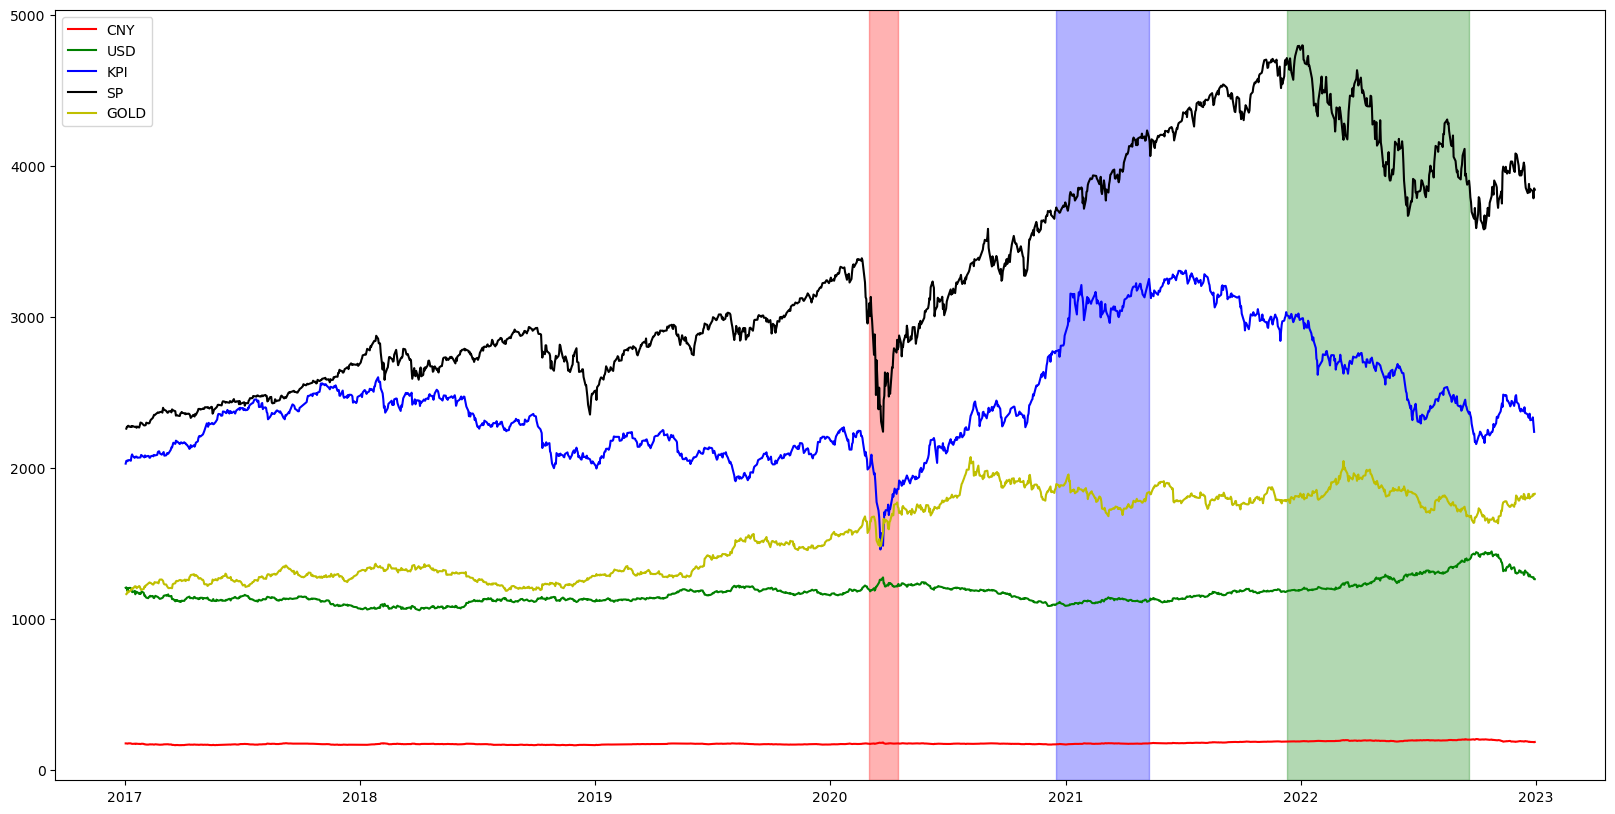

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

cny.index = pd.to_datetime(cny.index)
usd.index = pd.to_datetime(usd.index)
kpi.index = pd.to_datetime(kpi.index)
gold.index = pd.to_datetime(gold.index)
sp.index = pd.to_datetime(sp.index)

plt.figure(figsize=(20, 10))

plt.plot(cny.index, cny.close, color='r', label='CNY')
plt.plot(usd.index, usd.close, color='g', label='USD')
plt.plot(kpi.index, kpi.close, color='b', label='KPI')
plt.plot(sp.index, sp.close, color='k', label='SP')
plt.plot(gold.index, gold.close, color='y', label='GOLD')

# 특정 부분 강조하기
plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-04-15'), ymin=0, ymax=1, color='red', alpha=0.3)
plt.axvspan(pd.to_datetime('2020-12-16'), pd.to_datetime('2021-05-10'), ymin=0, ymax=1, color='blue', alpha=0.3)
plt.axvspan(pd.to_datetime('2021-12-11'), pd.to_datetime('2022-09-19'), ymin=0, ymax=1, color='green', alpha=0.3)
plt.legend(loc='upper left')
plt.show()

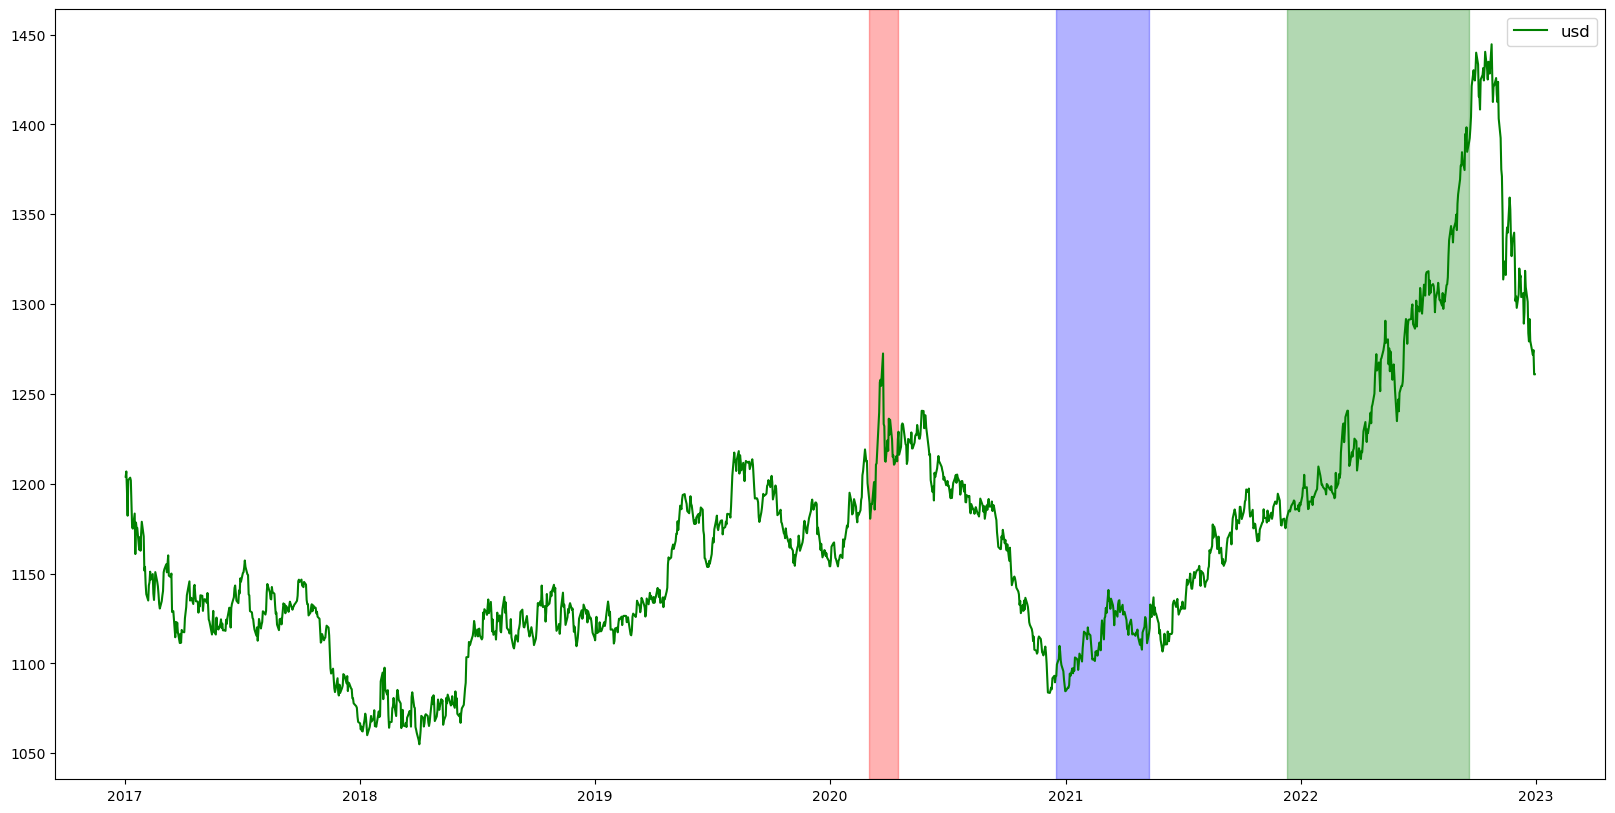

In [78]:
usd.index = pd.to_datetime(usd.index)
plt.figure(figsize=(20, 10))
plt.plot(usd.index, usd.close, color='g')
plt.legend(['usd'], fontsize=12, loc='best')
plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-04-15'), ymin=0, ymax=1, color='red', alpha=0.3)
plt.axvspan(pd.to_datetime('2020-12-16'), pd.to_datetime('2021-05-10'), ymin=0, ymax=1, color='blue', alpha=0.3)
plt.axvspan(pd.to_datetime('2021-12-11'), pd.to_datetime('2022-09-19'), ymin=0, ymax=1, color='green', alpha=0.3)

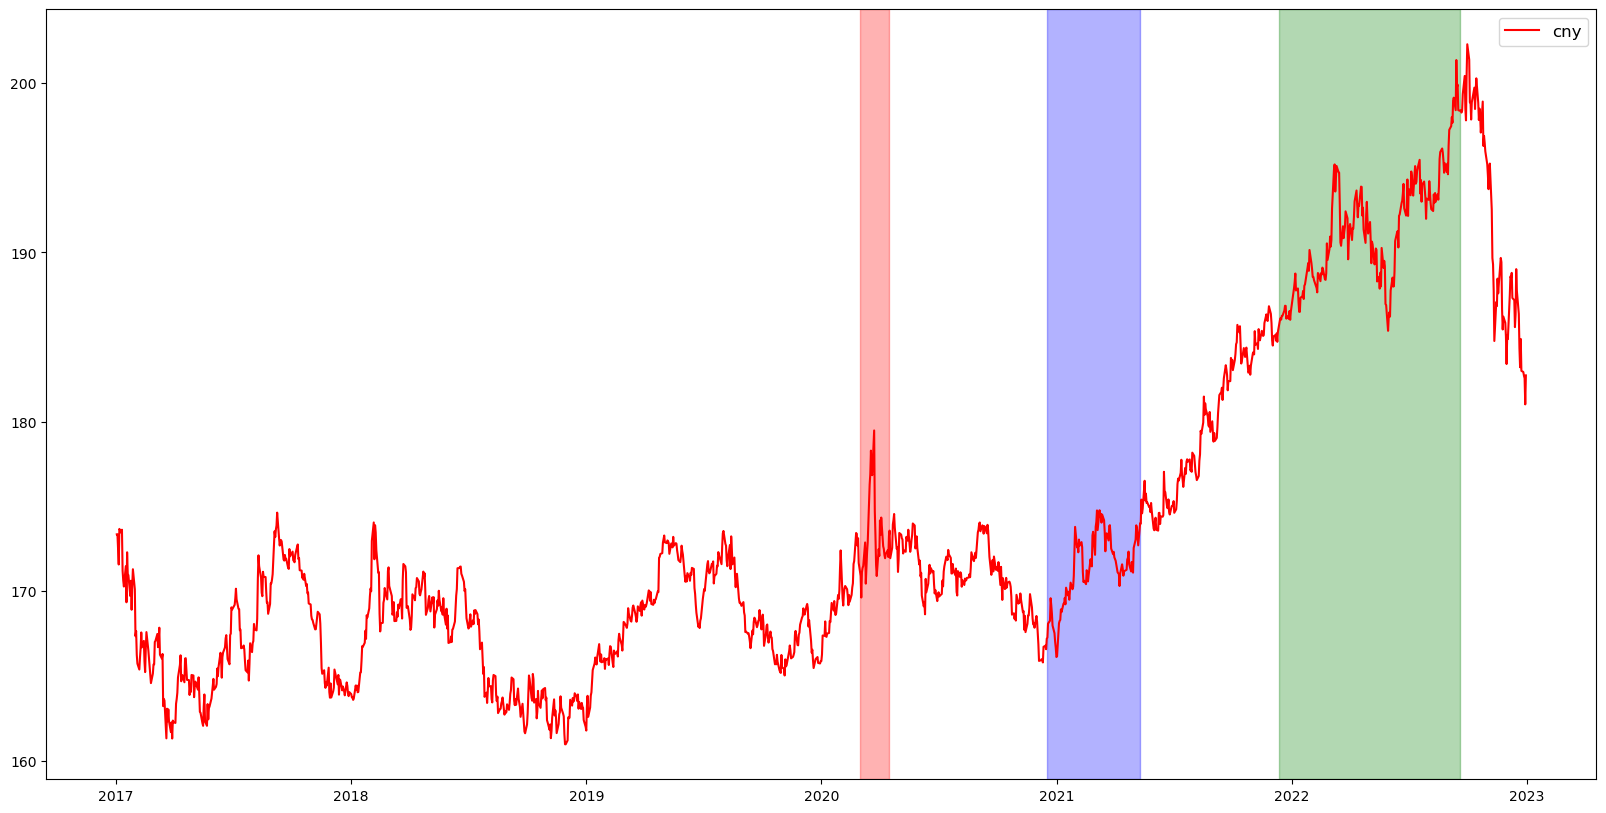

In [79]:
cny.index = pd.to_datetime(cny.index)
plt.figure(figsize=(20, 10))
plt.plot(cny.index, cny.close, color='r')
plt.legend(['cny'], fontsize=12, loc='best')
plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-04-15'), ymin=0, ymax=1, color='red', alpha=0.3)
plt.axvspan(pd.to_datetime('2020-12-16'), pd.to_datetime('2021-05-10'), ymin=0, ymax=1, color='blue', alpha=0.3)
plt.axvspan(pd.to_datetime('2021-12-11'), pd.to_datetime('2022-09-19'), ymin=0, ymax=1, color='green', alpha=0.3)

In [80]:
import pandas as pd

df = pd.DataFrame([['kdak.close', 'kpi.close']])
df2 = pd.DataFrame([['kdak.open', 'kpi.open']])

corr = df.corrwith(df2[0])
print(corr)

Series([], dtype: float64)


C:\Users\eyeco\AppData\Local\Temp\ipykernel_10676\1576627139.py:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corrwith(df2[0])


<Axes: >

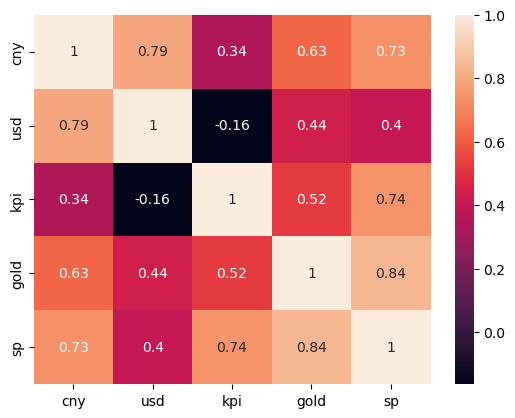

In [81]:
import pandas as pd
import seaborn as sns

cny1 = cny['close']
usd1 = usd['close']
kpi1 = kpi['close']
gold1 = gold['close']
sp1 = sp['close']

# Fill in missing values with the mean
kpi1.fillna(kpi1.mean(), inplace=True)

df = pd.DataFrame({'cny': cny1, 'usd': usd1, 'kpi': kpi1, 'gold': gold1, 'sp': sp1})
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)

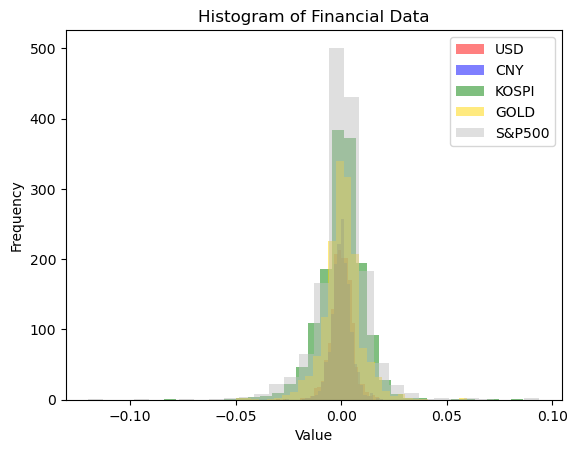

In [82]:
plt.hist(usd['fluctuations'], bins=30, color='red', alpha=0.5, label='USD')
plt.hist(cny['fluctuations'], bins=30, color='blue', alpha=0.5, label='CNY')
plt.hist(kpi['fluctuations'], bins=30, color='green', alpha=0.5, label='KOSPI')
plt.hist(gold['fluctuations'], bins=30, color='gold', alpha=0.5, label='GOLD')
plt.hist(sp['fluctuations'], bins=30, color='silver', alpha=0.5, label='S&P500')

# 그래프 제목과 축 레이블 설정
plt.title('Histogram of Financial Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

In [83]:
kpi_52 = pd.read_csv("koskpi_52.csv")
kpi200_52 = pd.read_csv("kospi200_52.csv")
kpi200_52.head()

,date,close,open,high,low
0,2022-01-02,390.85,397.16,399.44,385.30
1,2022-01-09,387.45,389.68,395.93,384.79
2,2022-01-16,376.08,387.00,387.33,373.35
3,2022-01-23,357.98,374.64,375.45,347.28
4,2022-01-30,366.34,364.07,366.79,361.60


In [84]:
date = kpi_52['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
kpi_52['date'] = new_date
kpi_52.dtypes
kpi_52 = kpi_52.set_index(kpi_52['date'])
kpi_52 = kpi_52.drop(['date'],axis=1)
kpi_52 = kpi_52.sort_values(by = ['date'])
kpi_52

,close,open,high,low
date,,,,
2022-01-02,2954.89,2998.32,3010.77,2915.38
2022-01-09,2921.92,2947.37,2982.14,2909.82
2022-01-16,2834.29,2918.55,2919.67,2817.11
2022-01-23,2663.34,2823.76,2828.11,2591.53
2022-01-30,2750.26,2706.34,2751.80,2702.78
2022-02-06,2747.71,2750.70,2788.27,2718.94
2022-02-13,2744.52,2715.10,2770.66,2665.47
2022-02-20,2676.76,2706.65,2746.62,2642.63
2022-02-27,2713.43,2663.00,2748.21,2658.25


In [85]:
date = kpi200_52['date']
new_date = [datetime.strptime(d.strip(),'%Y-%m-%d')for d in date]
new_date
kpi200_52['date'] = new_date
kpi200_52.dtypes
kpi200_52 = kpi200_52.set_index(kpi200_52['date'])
kpi200_52 = kpi200_52.drop(['date'],axis=1)
kpi200_52 = kpi200_52.sort_values(by = ['date'])
kpi200_52

,close,open,high,low
date,,,,
2022-01-02,390.85,397.16,399.44,385.30
2022-01-09,387.45,389.68,395.93,384.79
2022-01-16,376.08,387.00,387.33,373.35
2022-01-23,357.98,374.64,375.45,347.28
2022-01-30,366.34,364.07,366.79,361.60
2022-02-06,368.61,365.40,372.86,359.59
2022-02-13,368.55,364.36,373.03,358.75
2022-02-20,358.44,362.83,368.75,354.01
2022-02-27,361.69,356.59,367.40,355.77


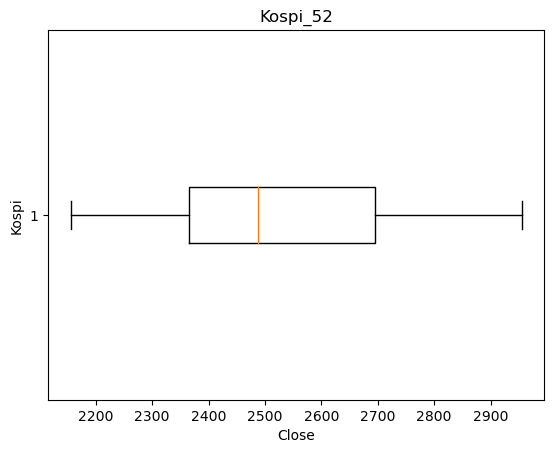

In [86]:
import matplotlib.pyplot as plt

kpi_52_1 = kpi_52['close']

fig,ax = plt.subplots()

ax.boxplot(kpi_52_1, vert=False)

ax.set_xlabel('Close')
ax.set_ylabel('Kospi')
ax.set_title('Kospi_52')

plt.show()

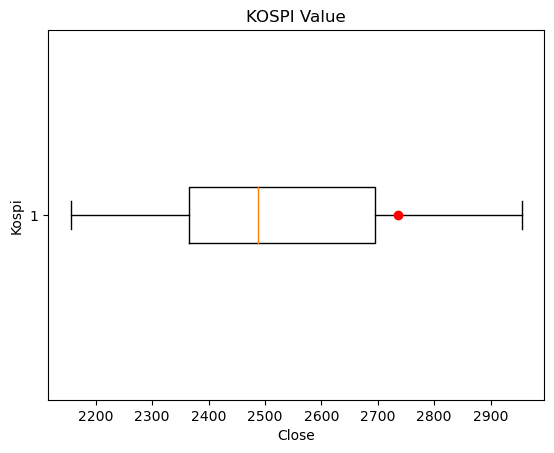

In [87]:
#코스피

import matplotlib.pyplot as plt

# Example data
kpi_52_1 = kpi_52['close']

# 2022년 중 랜덤 KOSPI(2022-03-23) 값
current_kospi_1 = 2735.05

fig, ax = plt.subplots()

ax.boxplot(kpi_52_1, vert=False)

# Add a red dot for the current KOSPI value
ax.plot(current_kospi_1, 1, 'ro')

ax.set_xlabel('Close')
ax.set_ylabel('Kospi')
ax.set_title('KOSPI Value')

plt.show()

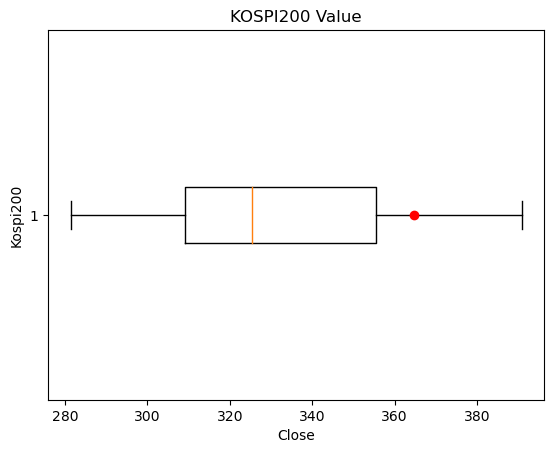

In [88]:
#코스피200 지수

kpi200_52_1 = kpi200_52['close']

# 2022년 중 랜덤 KOSPI200(2022-03-23) 값
current_kospi_2 = 364.84

fig, ax = plt.subplots()

ax.boxplot(kpi200_52_1, vert=False)

# Add a red dot for the current KOSPI value
ax.plot(current_kospi_2, 1, 'ro')

ax.set_xlabel('Close')
ax.set_ylabel('Kospi200')
ax.set_title('KOSPI200 Value')

plt.show()

In [89]:
kpi_52_1.describe()

count      52.000000
mean     2520.422885
std       197.651775
min      2155.490000
25%      2364.955000
50%      2486.980000
75%      2695.302500
max      2954.890000
Name: close, dtype: float64

In [90]:
kpi_52_2 = kpi_52_1.mean()
kpi200_52_2 = kpi200_52_1.mean()
#kpi200_52_2
kpi_52_2

2520.4228846153846

In [91]:
kpi_gap= kpi200_52_1/kpi_52_1*100
kpi_gap

date
2022-01-02    13.227227
2022-01-09    13.260117
2022-01-16    13.268932
2022-01-23    13.441018
2022-01-30    13.320195
2022-02-06    13.415171
2022-02-13    13.428578
2022-02-20    13.390816
2022-02-27    13.329623
2022-03-06    13.351094
2022-03-13    13.384829
2022-03-20    13.262368
2022-03-27    13.255835
2022-04-03    13.183651
2022-04-10    13.124337
2022-04-17    13.141150
2022-04-24    13.175266
2022-05-01    13.197152
2022-05-08    13.266826
2022-05-15    13.234241
2022-05-22    13.193078
2022-05-29    13.180686
2022-06-05    13.170536
2022-06-12    13.113444
2022-06-19    13.186428
2022-06-26    13.187185
2022-07-03    13.194447
2022-07-10    13.209466
2022-07-17    13.259985
2022-07-24    13.188252
2022-07-31    13.148386
2022-08-07    13.080611
2022-08-14    13.109933
2022-08-21    13.055465
2022-08-28    12.987412
2022-09-04    12.964920
2022-09-11    12.955036
2022-09-18    13.001747
2022-09-25    13.053180
2022-10-02    13.006306
2022-10-09    13.078123
2022-10-16 

In [92]:
current_kospi_gap = current_kospi_2/current_kospi_1*100
current_kospi_gap

13.33942706714685

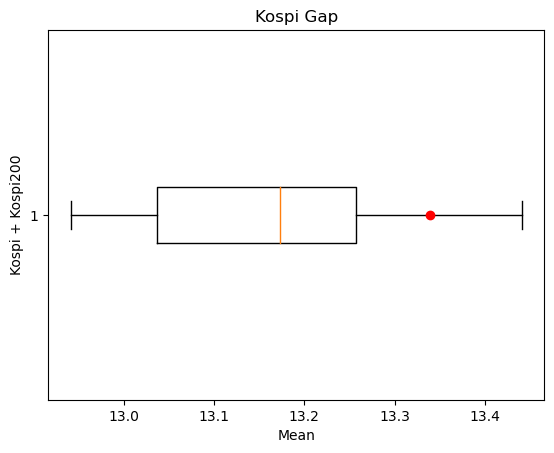

In [93]:
#코스피 갭 비율

# 2022년 중 랜덤 K 
current_kospi_gap

fig, ax = plt.subplots()

ax.boxplot(kpi_gap, vert=False)

# Add a red dot for the current KOSPI value
ax.plot(current_kospi_gap, 1, 'ro')

ax.set_xlabel('Mean')
ax.set_ylabel('Kospi + Kospi200')
ax.set_title('Kospi Gap')

plt.show()

In [94]:
kpi_good = kpi200_52_1/kpi_gap*100
kpi_good

date
2022-01-02    2954.89
2022-01-09    2921.92
2022-01-16    2834.29
2022-01-23    2663.34
2022-01-30    2750.26
2022-02-06    2747.71
2022-02-13    2744.52
2022-02-20    2676.76
2022-02-27    2713.43
2022-03-06    2661.28
2022-03-13    2707.02
2022-03-20    2729.98
2022-03-27    2739.85
2022-04-03    2700.39
2022-04-10    2696.06
2022-04-17    2704.71
2022-04-24    2695.05
2022-05-01    2644.51
2022-05-08    2604.24
2022-05-15    2639.29
2022-05-22    2638.05
2022-05-29    2670.65
2022-06-05    2595.87
2022-06-12    2440.93
2022-06-19    2366.60
2022-06-26    2305.42
2022-07-03    2350.61
2022-07-10    2330.98
2022-07-17    2393.14
2022-07-24    2451.50
2022-07-31    2490.80
2022-08-07    2527.94
2022-08-14    2492.69
2022-08-21    2481.03
2022-08-28    2409.41
2022-09-04    2384.28
2022-09-11    2382.78
2022-09-18    2290.00
2022-09-25    2155.49
2022-10-02    2232.84
2022-10-09    2212.55
2022-10-16    2213.12
2022-10-23    2268.40
2022-10-30    2348.43
2022-11-06    2483.16
2022-

In [95]:
current_kospi_good = current_kospi_2/current_kospi_gap*100
current_kospi_good

2735.05

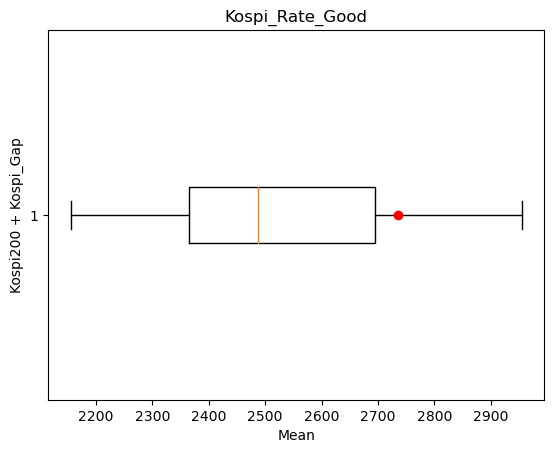

In [96]:
#코스피 적정 시점

# 2022년 중 랜덤 KOSPI200 값
current_kospi_good

fig, ax = plt.subplots()

ax.boxplot(kpi_good, vert=False)

# Add a red dot for the current KOSPI value
ax.plot(current_kospi_good, 1, 'ro')

ax.set_xlabel('Mean')
ax.set_ylabel('Kospi200 + Kospi_Gap')
ax.set_title('Kospi_Rate_Good')

plt.show()